# Probability Integral Transform (PIT)

- This theorem has two key statements:
  
1. If a continuous random variable X has a well-defined CDF, $F_x$. Take samples from X and plug into the CDF, guess what? They will follow a uniform distributions. This is denoted mathematically as:

$$
U = F_X(X) \sim \text{Uniform}(0,1)
$$

2. if $U \sim \text{Uniform}(0,1)$ and $F_x$ is the CDF of a random variable $X$ then,

   $$
   X = F_x^{-1}(U)
   $$

## First Statement

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import FancyArrowPatch
from matplotlib.animation import FuncAnimation

Below are the plots of the PDF and CDF of the exponential distribution

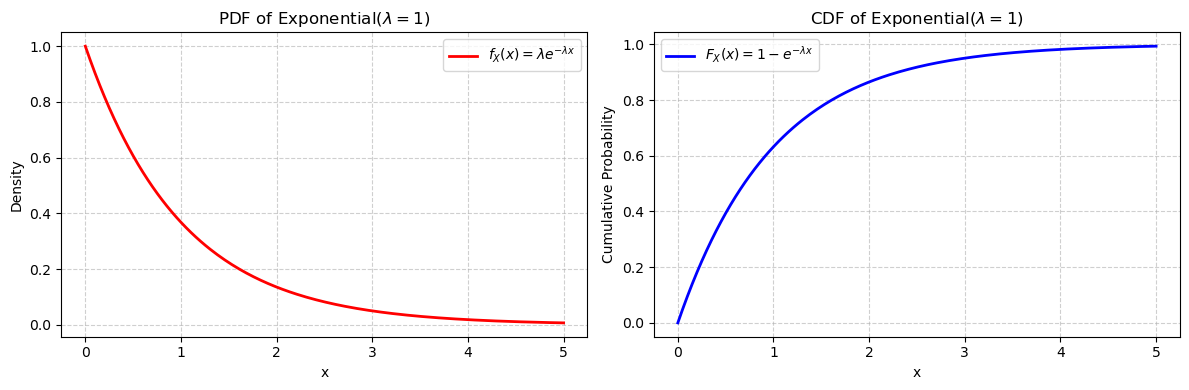

In [8]:
# Parameters
lam = 1.0   # rate λ
x = np.linspace(0, 5, 200)

# Exponential PDF and CDF
f_x = lam * np.exp(-lam * x)      # PDF
F_x = 1 - np.exp(-lam * x)        # CDF

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

# PDF
ax1.plot(x, f_x, color="red", lw=2, label=r"$f_X(x) = \lambda e^{-\lambda x}$")
ax1.set_title("PDF of Exponential($\lambda=1$)")
ax1.set_xlabel("x")
ax1.set_ylabel("Density")
ax1.grid(True, linestyle="--", alpha=0.6)
ax1.legend()

# CDF
ax2.plot(x, F_x, color="blue", lw=2, label=r"$F_X(x) = 1 - e^{-\lambda x}$")
ax2.set_title("CDF of Exponential($\lambda=1$)")
ax2.set_xlabel("x")
ax2.set_ylabel("Cumulative Probability")
ax2.grid(True, linestyle="--", alpha=0.6)
ax2.legend()

plt.tight_layout()
plt.show()


By the PIT, if we take samples, in this case, 10 samples, from the probability density function of the exponential distribution:

In [35]:
X_samples_exp = np.random.exponential(size = 10)
print(X_samples_exp)

[1.35990964 0.49193606 1.22692593 1.25891327 1.13956095 0.3043358
 1.193007   0.90106255 0.08305786 1.7107157 ]


and plug them into the CDF (of the same distribution: $F_x(X) = 1-\exp^{-\lambda x}$)

In [37]:
F_x = 1 - np.exp(-lam * X_samples_exp)  
F_x

array([0.74331603, 0.38855854, 0.70680751, 0.71603755, 0.68004053,
       0.26238686, 0.69669216, 0.59386211, 0.0797021 , 0.81926361])

We see that the distribution of these 10 samples looks uniformly distribution

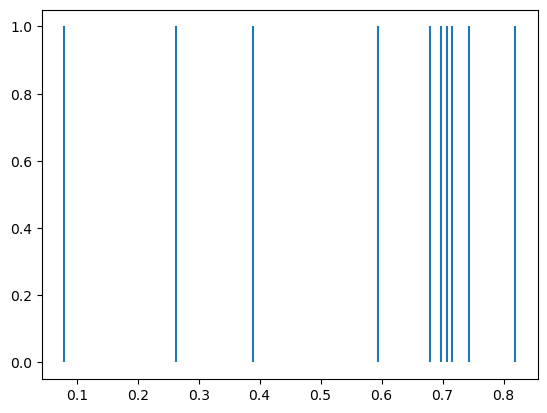

In [39]:
plt.vlines(F_x,0,1);

Increasing the sample size, we have;

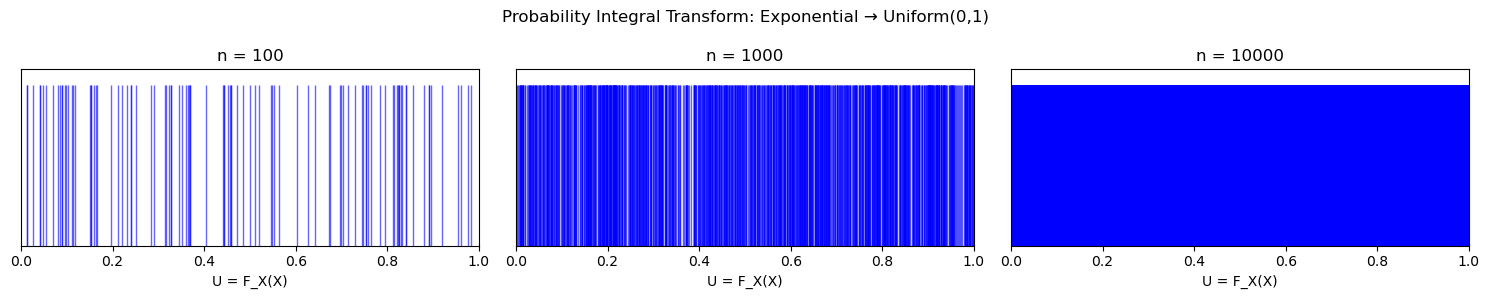

In [40]:
# Parameters
lam = 1.0
sample_sizes = [100, 1000, 10000]

fig, axes = plt.subplots(1, 3, figsize=(15, 3))

for ax, n in zip(axes, sample_sizes):
    # Sample from Exp(lam)
    X_samples_exp = np.random.exponential(scale=1/lam, size=n)
    
    # PIT: U = F_X(X) = 1 - e^{-lam * X}
    F_x = 1 - np.exp(-lam * X_samples_exp)
    
    # Plot vertical lines
    ax.vlines(F_x, 0, 1, color="blue", alpha=0.6, lw=1)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1.1)
    ax.set_title(f"n = {n}")
    ax.set_yticks([])
    ax.set_xlabel("U = F_X(X)")

plt.suptitle("Probability Integral Transform: Exponential → Uniform(0,1)")
plt.tight_layout()
plt.show()


## Second Statement

If we have a uniform distribution, we can get any distribution as long at the CDF of that distribution has an inverse (A quantile function)


First, generate a uniform distribution 

Some of the generated number (U): [0.90750741 0.34390972 0.93563133 0.22683602 0.93363142 0.24061837
 0.87153468 0.60505502 0.47277024 0.72376827]


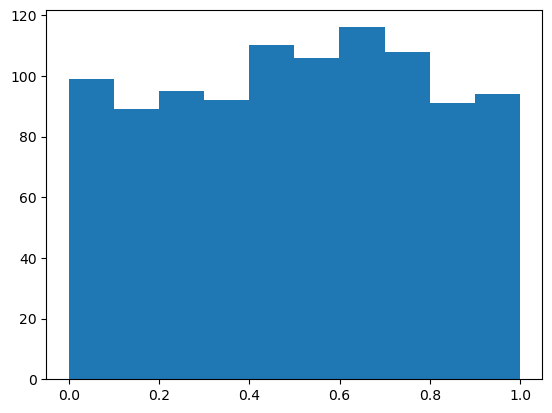

In [28]:
import numpy as np
import matplotlib.pyplot as plt

lam = 1.0
n = 1000

# Step 1: Generate uniform(0,1)
U = np.random.uniform(0,1,n)

print("Some of the generated number (U):", U[:10])
plt.hist(U);

If we plug the above values into the quantile function (inverse of a CDF) of an exponential distribution:

$$
X = -\frac{\ln(1 - U)}{\lambda}
$$

Here, $\lambda$ = 1

In [29]:
# Step 2: Apply inverse CDF of exponential
X = -np.log(1 - U) / lam
X[:10]

array([2.38062672, 0.42145688, 2.74312823, 0.25726412, 2.71253152,
       0.27525082, 2.05209632, 0.9290088 , 0.64011886, 1.28651517])

The values have now been converted to what is seen above.

Now, let us plot the distribution of these values against the pdf of the exponential distribution:

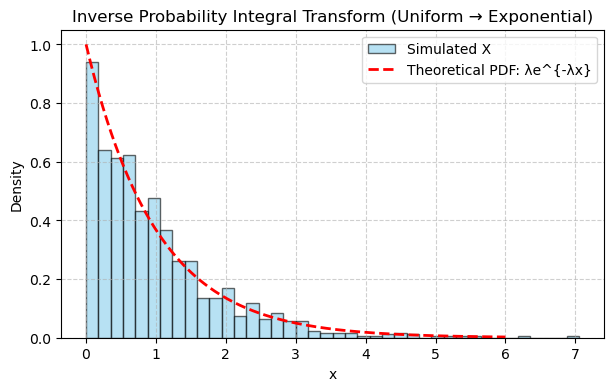

In [30]:
x_vals = np.linspace(0, 6, 200)
pdf_theoretical = lam * np.exp(-lam * x_vals)

plt.figure(figsize=(7,4))
plt.hist(X, bins=40, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="Simulated X")
plt.plot(x_vals, pdf_theoretical, "r--", lw=2, label="Theoretical PDF: λe^{-λx}")
plt.title("Inverse Probability Integral Transform (Uniform → Exponential)")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

We can see that the simulated values gotten from the uniform distribution and plugged into the quantile function of the exponential distribuion follows the pdf of an exponential distribution. 



## Conclusion:

We went from an exponential distribution to a uniform distribution, and then from a uniform distribution to an exponential distribution.